In [1]:
import math, random
random.seed(0)

fineness = 200
samplesize = 50000

def T(x):
    return -2 * pow((1 - x), 3) + 1.5 * (1 - x) + 0.5
    # return - (3/2 + math.sqrt(2))*pow(x, 2) + (2 + math.sqrt(2)) * x

def step_sample(i): 
    return i / samplesize

def uniform_sample(i):
    return random.uniform(0, 1)

def sampleAlong(fun, sample_fun, samplesize, fineness):
    xs = [0] * samplesize
    ys_histogram = [0] * fineness

    for i in range(0, samplesize):
        xs[i] = sample_fun(i)
        rand = fun(xs[i])
        rand = rand * fineness
        if rand < fineness:
            ys_histogram[int(rand)] = ys_histogram[int(rand)] + 1
        else:
            ys_histogram[fineness - 1] = ys_histogram[fineness - 1] + 1
    return xs, ys_histogram

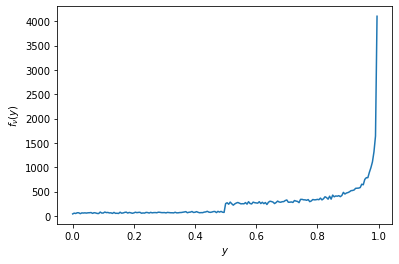

In [2]:
xs, ys_histogram = sampleAlong(T, uniform_sample, samplesize, fineness)

import matplotlib.pyplot as plt
import numpy

def xiter(fineness, start, stop):
    return [x / fineness for x in range(start, start + fineness * stop)]

def plot_histogram(ys_histogram, x_values):
    plt.plot(x_values, ys_histogram)

    # plt.plot(-numpy.array(ys_histogram), xiter)
    # plt.ylim(0, 1)
    plt.ylabel(r'$f_{\nu}(y)$')
    plt.xlabel(r'$y$')
    plt.show()

plot_histogram(ys_histogram, xiter(fineness, 0, 1))

In [3]:
xs.sort() # TODO: remove?

# xs.reverse() # Start from the right place of the curve so that it matches the graph

def lags (list, n):
    lagged_lists = []
    
    for i in range(0, n + 1):
        new_lag = list[i:(len(list) - (n - i))]
        lagged_lists.append(new_lag)

    return lagged_lists

ys = [T(x) for x in xs]
lagged_lists = lags(ys, 1)
ys0 = lagged_lists[0]
ys1 = lagged_lists[1]

#print (numpy.array(ys) - numpy.array(ys1))
print(ys0[:10])
print(ys1[:10])

[5.5079370259836224e-05, 6.602550231726845e-05, 0.0001047609724418308, 0.0006041589319791818, 0.000738138384770215, 0.00096406558407236, 0.0010827867822371662, 0.001222328090039193, 0.0013028041894984632, 0.001377145352482012]
[6.602550231726845e-05, 0.0001047609724418308, 0.0006041589319791818, 0.000738138384770215, 0.00096406558407236, 0.0010827867822371662, 0.001222328090039193, 0.0013028041894984632, 0.001377145352482012, 0.0014935539610223536]


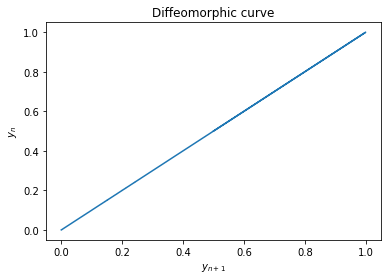

In [4]:
#plt.axes(projection='3d')
plt.plot(ys1, ys0)
plt.title("Diffeomorphic curve")

plt.xlabel('$y_{n+1}$')
plt.ylabel('$y_{n}$')
plt.show()

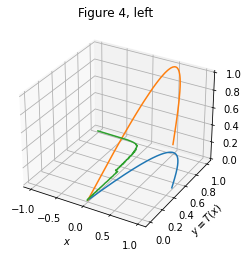

In [5]:
plt.axes(projection='3d')

plt.plot(xs, [T(x) for x in xs], 0)
plt.plot(xs[1:], ys0, ys1)
plt.plot(-numpy.array(ys_histogram) / max(ys_histogram), numpy.array(xiter(fineness, 0, 1)), 0)

plt.title('Figure 4, left')
plt.xlabel('$x$')
plt.ylabel('$y \equiv T(x)$')
plt.show()

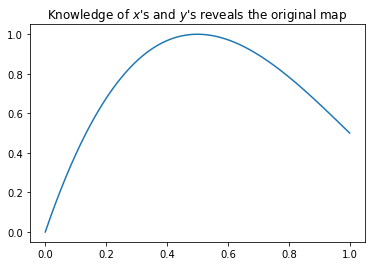

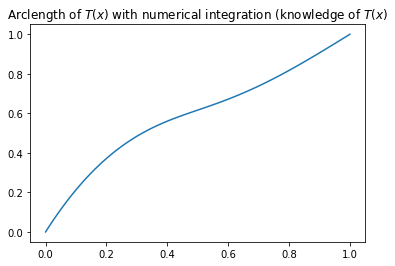

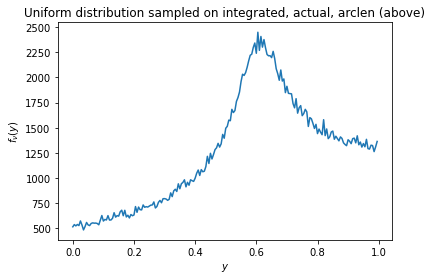

In [6]:
def sampled_arclen(xs, ys):
    p1 = numpy.array([lags(xs, 1)[0], lags(ys, 1)[0]])
    p2 = numpy.array([lags(xs, 1)[1], lags(ys, 1)[1]])

    dist = numpy.sqrt(numpy.sum((p2 - p1)**2, axis=0))
    arclen = [0] * len(dist)
    for i in range(1, len(arclen)):
        arclen[i] = arclen[i - 1] + dist[i - 1]
    
    return arclen

plt.plot(xs, ys)
plt.title('Knowledge of $x$\'s and $y$\'s reveals the original map')
plt.show()

from scipy.integrate import quad

def arclengthT(x):
    return quad(lambda x: math.sqrt(1 + pow((4.5 - 12*x + 6*pow(x,2)), 2)), 0, x)[0]

testX = numpy.linspace(0, 1, 100)
plt.plot(testX, [arclengthT(x) / arclengthT(1) for x in testX])
plt.title('Arclength of $T(x)$ with numerical integration (knowledge of $T(x)$')
plt.show()

plt.title('Uniform distribution sampled on integrated, actual, arclen (above)')
plot_histogram(sampleAlong(lambda x: arclengthT(x) / arclengthT(1), uniform_sample, samplesize * 5, fineness)[1], xiter(fineness, 0, 1))
plt.show()

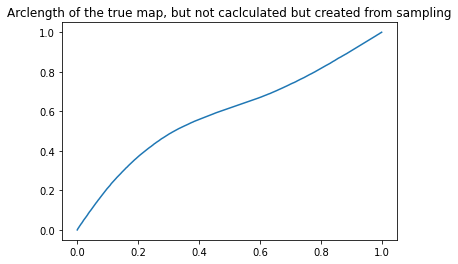

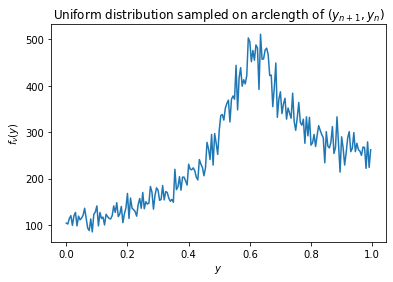

In [7]:
arclen = sampled_arclen(xs, ys)
arclen = [arclen[i] / arclen[len(arclen) - 1] for i in range(len(arclen))]

plt.plot(xiter(samplesize, 0, 1)[0:(samplesize - 1)], arclen)
plt.title('Arclength of the true map, but not caclculated but created from sampling')
plt.show()

plt.title('Uniform distribution sampled on arclength of $(y_{n+1}, y_n)$')
plot_histogram(sampleAlong(lambda x: arclen[int(x * len(arclen))], uniform_sample, samplesize, fineness)[1], xiter(fineness, 0, 1))
plt.show()

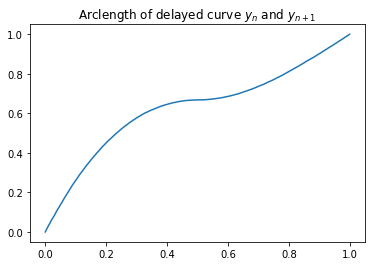

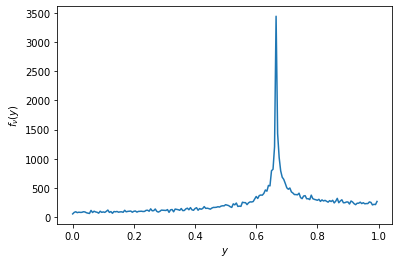

In [19]:
arclen = sampled_arclen(ys0, ys1)
arclen = [arclen[i] / arclen[len(arclen) - 1] for i in range(len(arclen))]

plt.plot(xiter(samplesize, 0, 1)[1:(samplesize - 1)], arclen)
plt.title('Arclength of delayed curve $y_{n}$ and $y_{n+1}$')
plt.show()

# TODO: singularity?

plot_histogram(sampleAlong(lambda x: arclen[int(x * len(arclen))], uniform_sample, samplesize, fineness)[1], xiter(fineness, 0, 1))